In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Reviews.csv')
data.sort_values(by='feedback', ascending=False)

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
2068,2068,5,6-Jul-18,Black Plus,Enjoying it so much!!!,1
2059,2059,5,9-Jul-18,White Plus,Very good quality and you don’t have to yell o...,1
2060,2060,5,9-Jul-18,White Plus,So convenient ! I will never touch the remote...,1
2061,2061,5,9-Jul-18,Black Plus,We love everything,1
...,...,...,...,...,...,...
162,162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
2979,2979,1,30-Jul-18,White Dot,,0
1364,1364,2,19-Jul-18,Black Spot,"It's not as good as Siri, BUT it still has som...",0
2150,2150,2,30-Jul-18,Configuration: Fire TV Stick,I just think that it's to darn confusing. And ...,0


In [57]:
data.describe()

,Unnamed: 0,rating,feedback
count,3150.000,3150.000000,3150.000000
mean,1574.500,4.463175,0.918413
std,909.471,1.068506,0.273778
min,0.000,1.000000,0.000000
25%,787.250,4.000000,1.000000
50%,1574.500,5.000000,1.000000
75%,2361.750,5.000000,1.000000
max,3149.000,5.000000,1.000000


In [58]:
data.isnull().sum()

Unnamed: 0          0
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [59]:
data.columns

Index(['Unnamed: 0', 'rating', 'date', 'variation', 'verified_reviews',
       'feedback'],
      dtype='object')

In [60]:
ratings = data.rating.value_counts()
numbers = ratings.index
quantity = ratings.values

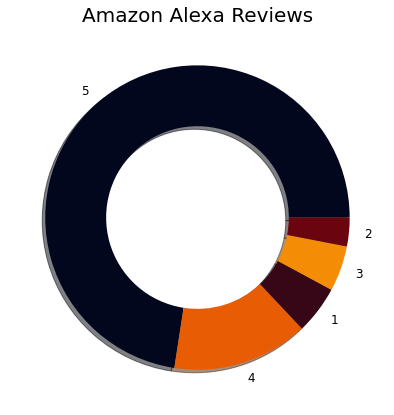

In [61]:
colors = ['#03071e', '#e85d04', '#370617', '#f48c06', '#6a040f']
wedge_properties = {"width":0.4 }
plt.figure(figsize=(7,7)) 
plt.pie(quantity, labels=numbers, colors=colors, shadow=True, pctdistance=0.7, wedgeprops=wedge_properties)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews", fontsize=20)
plt.show()

In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['verified_reviews']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['verified_reviews']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['verified_reviews']]
data.head()

,Unnamed: 0,rating,date,variation,verified_reviews,feedback,Positive,Negative,Neutral
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.692,0.000,0.308
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.807,0.000,0.193
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.106,0.095,0.799
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.347,0.000,0.653
4,4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000,0.000,1.000


In [78]:
x = sum(data.Positive)
y = sum(data.Negative)
z = sum(data.Neutral)

def sentiment(x,y,z):
    if x>y and x>z:
        print("Positive :)")
    elif y>x and y>z:
        print("Negative >_<")
    else:
        print("Neutral :|")

sentiment(x,y,z)

Neutral :|


In [97]:
comment = 'I love programming'

print("Let's calculate the sentiment of your comment:", comment)
print('_'*50)

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)

    print("{0:.2f}% Positive".format(sentiment_dict['pos']*100))
    print("{0:.2f}% Neutral".format(sentiment_dict['neu']*100))
    print("{0:.2f}% Negative".format(sentiment_dict['neg']*100))
    print("Sentence Overall Rated As", end = " ")
 
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")

    else :
        print("Neutral")

sentiment_scores(comment)

Let's calculate the sentiment of your comment: I love programming
__________________________________________________
67.70% Positive
32.30% Neutral
0.00% Negative
Sentence Overall Rated As Positive
